
# Objectif : Entraînement et évaluation d'un modèle Naive Bayes pour la classification du dépassement budgetaire

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Chargement des données

In [2]:
base = pd.read_csv("pretraitement.csv")

# 2. Séparation des variables explicatives (X) et de la cible (y)
X = base.drop("depassement", axis=1)
X = X.drop(columns=[col for col in X.columns if "libelle" in col])
y = base["depassement"]

## 3. Train/test split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

## 4. Entraînement du modèle Naive Bayes

In [4]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

## 5. Prédictions et évaluation

In [5]:
y_pred = nb.predict(X_test)

print("\n📊 Matrice de confusion :")
print(confusion_matrix(y_test, y_pred))

print("\n📋 Rapport de classification :")
print(classification_report(y_test, y_pred, digits=3, zero_division=0))


📊 Matrice de confusion :
[[ 18 156]
 [  2   7]]

📋 Rapport de classification :
              precision    recall  f1-score   support

           0      0.900     0.103     0.186       174
           1      0.043     0.778     0.081         9

    accuracy                          0.137       183
   macro avg      0.471     0.441     0.133       183
weighted avg      0.858     0.137     0.180       183



## 6. Visualisation de la matrice de confusion

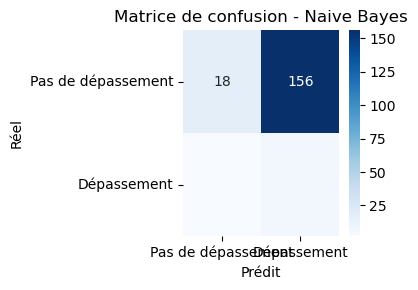

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pas de dépassement", "Dépassement"], yticklabels=["Pas de dépassement", "Dépassement"])
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion - Naive Bayes")
plt.tight_layout()
plt.show()

## 7. Export des résultats

In [7]:
df_report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True, zero_division=0)).transpose()
df_report.to_csv("resultats_naivebayes.csv")
print("\n✅ Rapport enregistré dans resultats_naivebayes.csv")


✅ Rapport enregistré dans resultats_naivebayes.csv
